In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from IPython.display import Audio

In [55]:
Fs, ans1 = wavfile.read('tsunami_cut.wav')
Fs, ans2 = wavfile.read('static_cut.wav')
Fs, ans3 = wavfile.read('symphony_cut.wav')
Fs, n_train = wavfile.read('n_train.wav')

a=np.vstack((ans1, ans2, ans3))
a

/Users/Ubini/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """Entry point for launching an IPython kernel.
/Users/Ubini/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[    1,    -2,     0, ..., -3461, -3477, -3492],
       [ 2722,  4016,  4742, ..., -2600,  -251,  2116],
       [-2135,  -915,   254, ..., -7254, -7618, -7953]], dtype=int16)

In [54]:
print("The first album : \n")
Audio(n_train, rate=Fs, autoplay=True)
n_train



The first album : 



array([ 0.03162128,  0.04616459,  0.05713052, ..., -0.0643016 ,
       -0.03562384, -0.01828215], dtype=float32)

In [51]:
theta_opt = np.linalg.lstsq(a.T, -n_train, rcond=None)[0]

print(theta_opt)

[-5.12042764e-06 -1.10380441e-05 -3.25987237e-06]


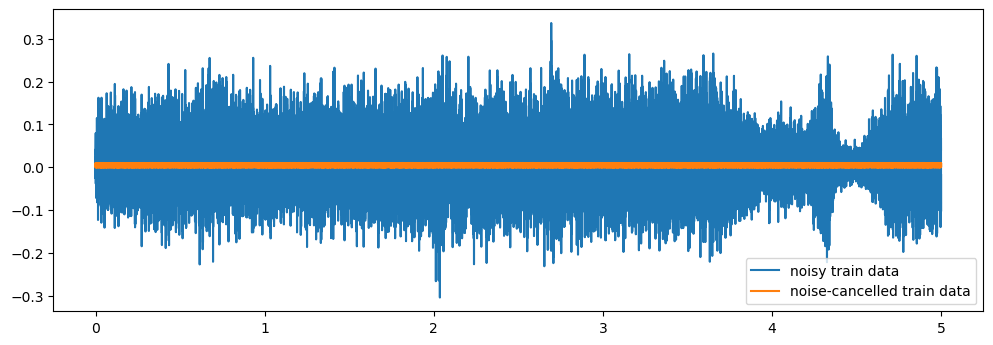

In [52]:
noise_cancelled_train = n_train + theta_opt.T@a
plt.figure(figsize=(12,4), dpi=100)
plt.plot(np.arange(len(n_train))/Fs, n_train, label="noisy train data")
plt.plot(np.arange(len(n_train))/Fs, noise_cancelled_train, label="noise-cancelled train data")
plt.legend()
plt.show()
Audio(noise_cancelled_train, rate=Fs, autoplay=True)


In [53]:
Fs, test_signal = wavfile.read('noisy_target.wav')
Audio(test_signal, rate=Fs, autoplay=True)

array([ 0.03162128,  0.04616459,  0.05713052, ..., -0.0643016 ,
       -0.03562384, -0.01828215], dtype=float32)

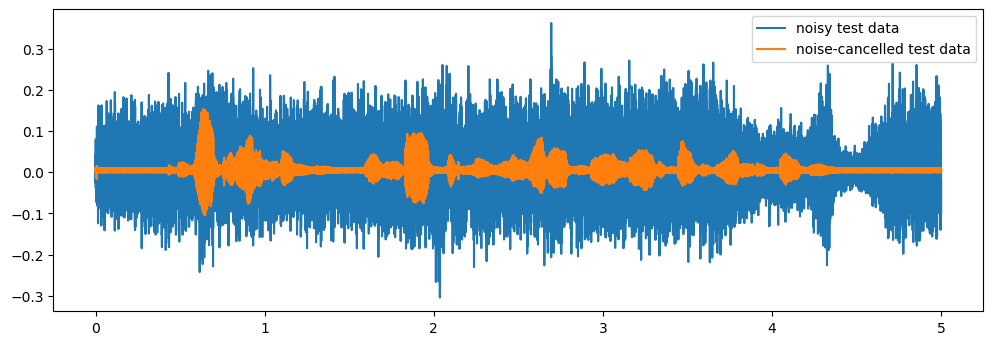

In [44]:
noise_cancelled_test = test_signal + theta_opt.T@a

plt.figure(figsize=(12,4), dpi=100)
plt.plot(np.arange(len(test_signal))/Fs, test_signal, label="noisy test data")
plt.plot(np.arange(len(test_signal))/Fs, noise_cancelled_test, label="noise-cancelled test data")
plt.legend()
plt.show()

Audio(noise_cancelled_test, rate=Fs, autoplay=True)